In [1]:
import pandas as pd
import numpy as np

In [2]:
# 1 kbit = 0.000125 MB
MBbyKb = 0.000125

In [3]:
data = {
    'Velocidad bajada (Kbps)': [2048, 2048], 
    'Velocidad subida (Kbps)': [1024, 1024], 
    'Velocidad bajada MB': [2048 * MBbyKb, 2048 * MBbyKb],
    'Velocidad subida MB': [1024 * MBbyKb, 2048 * MBbyKb],
    'Cantidad de horas mensual': [240, 480],
    'Tarifa mensual CUP': [2000, 3500],
    'Tarifa mensual pago por TF': [(2000 - 2000*0.10), (3500 - 3500*0.10)],
    'Precio x hora': [(2000/240), (3500/480)],
    'Precio x hora pago por TF': [((2000 - 2000*0.10)/240), ((3500 - 3500*0.10)/480)],
}

In [4]:
data = pd.DataFrame(data)

In [5]:
data

,Velocidad bajada (Kbps),Velocidad subida (Kbps),Velocidad bajada MB,Velocidad subida MB,Cantidad de horas mensual,Tarifa mensual CUP,Tarifa mensual pago por TF,Precio x hora,Precio x hora pago por TF
0,2048,1024,0.256,0.128,240,2000,1800.0,8.333333,7.5000
1,2048,1024,0.256,0.256,480,3500,3150.0,7.291667,6.5625


### Análisis de la tarifa plana

Asumiremos que el servicio se encuentra disponible 24 horas todos los días del mes, sin embargo usted debe dormir al menos 6 horas al día. Asumiremos que el resto de las horas del día (18 horas) usted se mantiene conectado, y procesaremos los meses como si todos tuvieran 30 días.

In [6]:
horas_al_mes = 18*30

horas_al_mes

540

In [7]:
velocidad_bajada_kb = np.array([512, 512, 1024, 1536, 2048, 2048, 3072, 4096, 5120, 6144])
velocidad_subida_kb = np.array([128, 256, 512, 512, 512, 1024, 1024, 1024, 1024, 1024])
velocidad_bajada_mb = velocidad_bajada_kb*MBbyKb
velocidad_subida_mb = velocidad_subida_kb*MBbyKb
cantidad_horas_mensual = np.array([horas_al_mes]*10)
tarifa_mensual = np.array([1250, 2000, 2750, 4500, 7000, 8250, 13000, 20000, 22250, 24125])
tarifa_mensual_pago_tf = [ p-(p*0.10) for p in tarifa_mensual]
precio_por_hora = [p/horas_al_mes for p in tarifa_mensual]
precio_por_hora_pago_tf = [p/horas_al_mes for p in tarifa_mensual_pago_tf]

In [8]:
data_tarifa_plana = {
    'Velocidad bajada (Kbps)': velocidad_bajada_kb, 
    'Velocidad subida (Kbps)': velocidad_subida_kb, 
    'Velocidad bajada MB': velocidad_bajada_mb,
    'Velocidad subida MB': velocidad_subida_mb,
    'Cantidad de horas mensual': cantidad_horas_mensual,
    'Tarifa mensual CUP': tarifa_mensual,
    'Tarifa mensual pago por TF': tarifa_mensual_pago_tf,
    'Precio x hora': precio_por_hora,
    'Precio x hora pago por TF': precio_por_hora_pago_tf,
}

In [9]:
data_tarifa_plana = pd.DataFrame(data_tarifa_plana)

In [10]:
data_tarifa_plana

,Velocidad bajada (Kbps),Velocidad subida (Kbps),Velocidad bajada MB,Velocidad subida MB,Cantidad de horas mensual,Tarifa mensual CUP,Tarifa mensual pago por TF,Precio x hora,Precio x hora pago por TF
0,512,128,0.064,0.016,540,1250,1125.0,2.314815,2.083333
1,512,256,0.064,0.032,540,2000,1800.0,3.703704,3.333333
2,1024,512,0.128,0.064,540,2750,2475.0,5.092593,4.583333
3,1536,512,0.192,0.064,540,4500,4050.0,8.333333,7.500000
4,2048,512,0.256,0.064,540,7000,6300.0,12.962963,11.666667
5,2048,1024,0.256,0.128,540,8250,7425.0,15.277778,13.750000
6,3072,1024,0.384,0.128,540,13000,11700.0,24.074074,21.666667
7,4096,1024,0.512,0.128,540,20000,18000.0,37.037037,33.333333
8,5120,1024,0.640,0.128,540,22250,20025.0,41.203704,37.083333
9,6144,1024,0.768,0.128,540,24125,21712.5,44.675926,40.208333


In [11]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12, 6)
plt.style.use('seaborn-darkgrid')

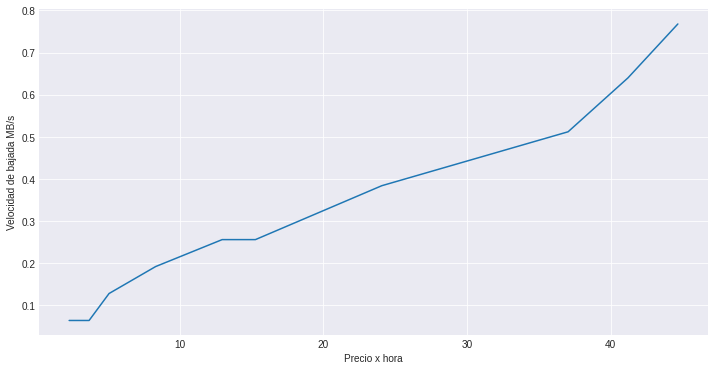

In [12]:
fig, ax = plt.subplots()
ax.plot(data_tarifa_plana['Precio x hora'], data_tarifa_plana['Velocidad bajada MB'])
ax.set_xlabel('Precio x hora')
ax.set_ylabel('Velocidad de bajada MB/s')

plt.show()